In [1]:
# Load necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import random
import os
path = 'C://Users//paarv//OneDrive - University of Illinois - Urbana//Desktop//IE 529//Hw'
os.chdir(path)

In [2]:
df = pd.read_csv("clustering.csv", header=None)
df.columns = ['x', 'y']
data = np.array(df)

In [3]:
print("Total Number of data points: ", len(df))

Total Number of data points:  2000


In [4]:
data

array([[ 0.17978, -1.0343 ],
       [-0.79447, -0.36758],
       [-1.392  , -0.02695],
       ...,
       [ 7.4358 ,  0.58226],
       [ 4.3794 ,  0.76743],
       [ 4.0792 ,  4.0048 ]])

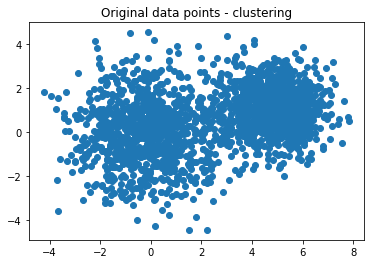

In [7]:
# Scatter plot of the original data
plt.scatter(df['x'], df['y'])
plt.title('Original data points - clustering')
plt.show()

# Lloyd's Algorithm
Steps:
1. Initialize K - random data points as centroids
2. Assign each data point in the data into one of those K centroids using 2-norm
3. Calculate the new centroids, which are just mean of the data points assigned to those K centroids
4. Replace old centorids with new centorids till they converge (cost function no more reduces)

In [8]:
def centroid_intialization(K, data):
    random.seed(23)
    KCentroidIndices = random.sample(range(0, len(data)), K)
    KCentroids = data[KCentroidIndices]
    return KCentroids

def cost_function(centers_, data): # WCSS with 2 norm (Eucl. distance)
    totCost = 0
    for clusterName, clusterChars in centers_.items(): # clusterChars is a list of lists, [ [centroid],[itsClusterptsIds] ]
        clusterCentroid = clusterChars[0]
        clusterPtIndices = clusterChars[1]
        totCost += totCost + np.sum(np.sum((data[clusterPtIndices] - clusterCentroid)**2))
    return totCost

def eucl_dist(centroid, other_pt_in_clust):
    return np.sum((centroid - other_pt_in_clust)**2)

In [9]:
# Set seed
random.seed(23)
random.sample(range(2, 100), 7)

[39, 12, 4, 77, 41, 56, 50]

In [75]:
cost = np.inf
tolerance = 1e-5

# Step 1
K = 2
Centorids = centroid_intialization(K=K, data=data)
print(Centorids)
print()

# Initialize empty list for every cluster
centers_ = {k:[[Centorids[k]], []] for k in range(0, K)}
print(centers_)
print(centers_.items())

def lloyds_algorithm_other(centers_=centers_, data=data, tolerance=tolerance, cost=cost):
    while True:
        for key in centers_.keys():
            centers_[key][1] = []

        for id_, pt in enumerate(data):
            distances = []
            for center in centers_.keys():
                centroid = centers_[center][0]
                dist = eucl_dist(centroid = centroid, other_pt_in_clust = pt)
                #print(dist)
                distances.append(dist) 
            minDist = np.min(distances)
            minDistIdx = np.argmin(distances)
            #print(minDistIdx)
            centers_[minDistIdx][1].append(id_)

        for center in centers_.keys():
            thisClustIdxs = centers_[center][1]
            centers_[center][0] = np.mean(data[thisClustIdxs], axis=0)
            #print(centers_)

        new_cost = cost_function(centers_, data)

        if np.abs(new_cost - cost) <=tolerance:
            #print(np.abs(new_cost - cost))
            print('Convergence reached!')
            break
        cost = new_cost
        print('WCSS: ', cost)

    print('Final Cost: ', cost)
    return cost, centers_, thisClustIdxs 

[[ 4.1584   0.71063]
 [ 4.7335  -0.16345]]

{0: [[array([4.1584 , 0.71063])], []], 1: [[array([ 4.7335 , -0.16345])], []]}
dict_items([(0, [[array([4.1584 , 0.71063])], []]), (1, [[array([ 4.7335 , -0.16345])], []])])


In [76]:
cost = np.inf
tolerance = 1e-5
cost, centers_, thisClustIdxs = lloyds_algorithm_other(centers_=centers_, data=data, tolerance=tolerance, cost=cost)

WCSS:  29946.6451666637
WCSS:  12989.784313100125
WCSS:  10013.113155043615
WCSS:  9725.663771169984
WCSS:  9695.849627943013
Convergence reached!
Final Cost:  9695.849627943013


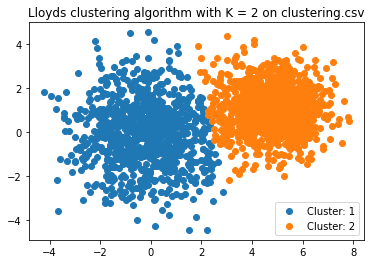

In [78]:
for cluster_id in centers_.keys():
    indexes = centers_[cluster_id][1]
    plt.scatter(data[indexes][:, 0], data[indexes][:, 1], label='Cluster: ' + str(cluster_id+1))
    plt.legend()
plt.title('Lloyds clustering algorithm with K = 2 on clustering.csv')
plt.show()

In [79]:
for key in centers_.keys():
    print(centers_[key][0])

[-0.2159331 -0.0629825]
[4.80833513 1.05385739]


In [28]:
# string = ''
# for val in centers_[1][1]:
#     string+= str(val) + str(', ')
# string

# K Centers intialization and clustering (Kmeans++)

# Steps
1. Initialize the K 
2. Take any random point - c1
3. Compute the farthest away point from this random point - c2
4. Now, you have 2 points, C = {c1, c2}
5. Take the third point such that after assigning each point to the nearest center from C, find the maximum distance
6. Repeat step 5 till all the K points are obtained.

In [29]:
# Step 1
K = 2

In [ ]:
np.argmax(np.array([[1,4,5],
         [4,69, 9]]))

In [ ]:
np.min(
    np.array(
    [[1,4,5],
    [4,69, 9]]
)
, axis=0)

In [85]:
# Step 2
import random

def calc_eucl_dist(x1, x2):
    eucl_dist = np.sum((x1 - x2)**2)
    return eucl_dist

def find_max_min(kCenterIds, data):
    
    distances = []
    for centerId in kCenterIds:
        dists = []
        center = data[centerId]
        for idx, pt in enumerate(data):
            if idx == centerId:
                #pass
                dist = np.inf
            dist = calc_eucl_dist(pt, center)
            dists.append(dist)
        distances.append(dists)
    distancesArr = np.array(distances)
    minDistToClusters = np.min(distancesArr, axis=0) #Assigning each point to nearest cluster based on distances(see above cell)
    #print(minDistToClusters)
    maxPtIdx = np.argmax(minDistToClusters)
    #print(maxPtIdx) 
    return maxPtIdx, len(dists)

def generate_k_points(K, data):
    kCenterIds = []
    random.seed(23)
    kCenterIds.append(random.randint(0, len(data)))
    if K <= 0:
        print('K is not Valid')
    else:
        if K==1:
            return kCenterIds
        else:
            for i in range(K-1):
                newPt, l = find_max_min(kCenterIds, data)
                #print(l)
                kCenterIds.append(newPt)
                #print(kCenterIds)
    return kCenterIds

In [31]:
K = 2
kCenters = generate_k_points(K = K, data = data)
kCenters

[1894, 642]

In [32]:
data[kCenters]

array([[ 4.1584 ,  0.71063],
       [-3.6773 , -3.5965 ]])

In [35]:
def plot_pts(kCenters, data):
    plt.figure(figsize=(7,5))
    plt.scatter(data[:, 0], data[:, 1])
    for idx in kCenters: 
        plt.scatter(data[idx, 0], data[idx, 1], color='red')
    plt.title('Red points denote the K-centers for clustering.csv')
    return plt.show()

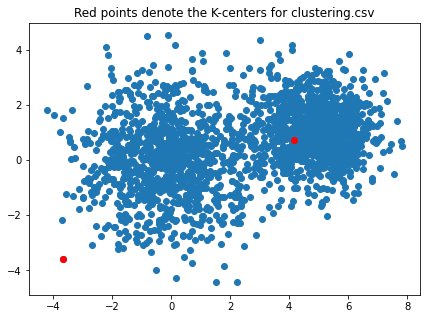

In [36]:
plot_pts(kCenters, data)

In [37]:
Centorids = data[kCenters]
Centorids

array([[ 4.1584 ,  0.71063],
       [-3.6773 , -3.5965 ]])

In [38]:
# Initialize empty list for every cluster
centers_ = {k:[[Centorids[k]], []] for k in range(K)}
print(centers_)
print(centers_.items())

{0: [[array([4.1584 , 0.71063])], []], 1: [[array([-3.6773, -3.5965])], []]}
dict_items([(0, [[array([4.1584 , 0.71063])], []]), (1, [[array([-3.6773, -3.5965])], []])])


In [39]:
cost = np.inf
tolerance = 1e-5

cost, centers_, thisClustIdxs = lloyds_algorithm_other(centers_, data, tolerance, cost)
print()
print('Cost after K-centers is: ', cost)
#print('Centers: ', centers_)

WCSS:  22676.71190120282
WCSS:  11603.513669565347
WCSS:  8938.873599112625
WCSS:  8457.186351503764
WCSS:  8371.637850768584
WCSS:  8364.922117842272
Convergence reached!
Final Cost:  8364.922117842272

Cost after K-centers is:  8364.922117842272


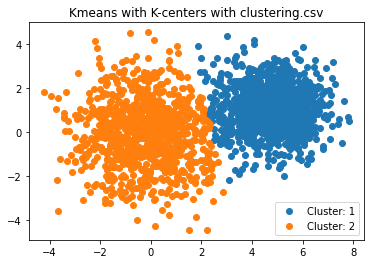

In [42]:
for cluster_id in centers_.keys():
    indexes = centers_[cluster_id][1]
    plt.scatter(data[indexes][:, 0], data[indexes][:, 1], label = 'Cluster: ' + str(cluster_id+1))
    plt.legend()
plt.title('Kmeans with K-centers with clustering.csv')
plt.show()

# K - Medians Swap

In [ ]:
K = 5
kCenters = generate_k_points(K = K, data = data)
kCenters

In [ ]:
Centorids = data[kCenters]
Centorids

In [ ]:
# Initialize empty list for every cluster
centers_ = {k:[[Centorids[k]], []] for k in range(K)}
print(centers_)
print(centers_.items())

In [ ]:
def plot_pts(kCenters, data):
    plt.figure(figsize=(10,10))
    plt.scatter(data[:, 0], data[:, 1])
    for idx in kCenters: 
        plt.scatter(data[idx, 0], data[idx, 1], color='red')
    return plt.show()

In [ ]:
plot_pts(kCenters, data)

In [51]:
def find_distance_matrix(kCenters,data):
    distance_matrix = [[np.sum((data[i] - data[j])**2)  for i in kCenters for  j in range(len(data))]]
    return distance_matrix

# def median_swal_algorithm(kCenters, data):
#     kCenters_swap = kCenters
#     for center in kCenters:
#         kCenters_swap.remove(center)
#         distance_matrix = find_distance_matrix(kCenters_swap, data) 
        
#     return

In [87]:
generate_k_points(K = K, data = data)

[1894, 642]

In [90]:
import numpy as np

tau = 0.05
K = 2

# Initialize K centroids using Greedy K centers algorithm
kCenters = generate_k_points(K = K, data = data)
centroids = kCenters.copy()
centroids_copy = centroids.copy()
X = np.asmatrix(data).copy()

def obj_func(distance_matrix,centroid,non_centroids_copy):
#     print(np.sum(np.square(X[non_centroids_copy,:] - X[centroid,:]),axis = 1))
    distance_matrix = np.hstack([distance_matrix,np.sum(np.square(X[non_centroids_copy,:] - X[centroid,:]),axis = 1)])
#     print(np.square(X[non_centroids_copy,:] - X[centroid,:]))
#     print(distance_matrix)
    distance_matrix = np.min(distance_matrix,axis = 1)
    
    return np.sum(distance_matrix)

points = list(range(len(X)))
    
for centroid in centroids:
    
    centroids_copy.remove(centroid)
    non_centroids = [i for i in points if i not in centroids_copy] 
    optimal_centroids = centroids_copy
    optimal_non_centroids = non_centroids.copy()
    
    distance_matrix = np.sum(np.square(X[non_centroids,:] - X[centroid,:]),axis = 1)
    
    for centroid in centroids_copy[1:]:
        distance_matrix = np.hstack([distance_matrix,np.sum(np.square(X[non_centroids,:] - X[centroid,:]),axis= 1)])
        distance_matrix = np.min(distance_matrix,axis = 1)
    
    non_centroids_copy = non_centroids.copy()
    new_loss = np.sum(distance_matrix)
    
    for non_centroid in non_centroids:
        
        #non_centroids_copy.remove(centroid)
        loss = obj_func(distance_matrix,non_centroid,non_centroids_copy)
        
        if loss < new_loss*(1-tau):
            
            new_loss = loss
            optimal_centroids = centroids_copy.copy() + [non_centroid]

            print("\nnew centroids ")
            print(optimal_centroids)
        
        non_centroids_copy = non_centroids.copy()
        

    centroids_copy = optimal_centroids.copy()

def get_cluster_assignment(X):
    cluster_assigned = np.apply_along_axis(self.nearest_cluster,arr = X,axis = 1)
    return X,cluster_assigned


new centroids 
[642, 0]

new centroids 
[642, 1]

new centroids 
[1, 0]

new centroids 
[1, 5]

new centroids 
[1, 8]

new centroids 
[1, 13]

new centroids 
[1, 46]

new centroids 
[1, 103]


In [91]:
optimal_centroids

[1, 103]

In [92]:
data[optimal_centroids]

array([[-0.79447, -0.36758],
       [ 2.8073 ,  0.73957]])

# Spectral clustering


# Steps
1. Initialize k for k-nearest neighbors, let us say k=5 and sigma = 0.1
2. Initialize the empty matrix of N x N where N = # of data points
3. Find the k-nearest neighbours and find the similarities by using the metric
        𝑒xp(||𝑥𝑖−𝑥𝑗||2)2 and fill the empty spaces with the appropriate places
4. This matrix is called the similarity matrix or the adjacency matrix, A
5. Create a diagonal matrix D with each element being the sum of each row of A
6. Now, the laplacian matrix L = D - A
7. Find the Eigen values and Eigen vectors of L
8. Determine the number of clusters, K  
9. Select the K smallest eigen values and their associated eigen vectors
10. Put all these eigen vectors together in columns and this matrix would be U
11. Now, Apply K-Means clustering to the matrix U and find those K clusters


In [48]:
# Step 1
N = len(data)
k = 10
sig = 1

# Step 2
A = np.zeros((N, N))

def guassian_similairty_fn(current_pt, data, sigma, k):
    norm2 = np.sum((current_pt - data)**2, axis=1)
    const = -1/(2*sig**2)
    similarities = np.exp(const * norm2)
    #print(similarities)
    kIndices = np.argsort(similarities)[::-1][1:k+1] # dont take 0 index as it is the distance of the pt to itself
    #print('K Indices: ', kIndices)
    kDistances = similarities[kIndices]
    #print('K Similarities: ', kDistances)
    return kIndices, kDistances

for idx, pt in enumerate(data):
    kNearestIndices, kNearestDists = guassian_similairty_fn(current_pt = pt, data =data, sigma = sig, k=k)
    A[idx][kNearestIndices] = kNearestDists

A = A + np.multiply(A.T,(A == 0).astype(int))

# To check for symmetricity
print('Is matrix A symmetrical: ', (A==A.T).all())

# Step 5
D_values = A.sum(axis=1)
D = np.diag(D_values)

# Step 6
L = D - A

# Step 7
c = 2   # 2 clusters
(eigenVals, eigenVects) = np.linalg.eig(L)
Kindices = np.argsort(eigenVals)[:c]
KeigenVals = eigenVals[Kindices]
KeigenVects = eigenVects[:,Kindices]

print(Kindices)
print()
print(KeigenVals)
print()
print(KeigenVects)

# Step 1
Centorids = centroid_intialization(K=c, data=KeigenVects)
print()
print('Centorids : ', Centorids)
print()
# Initialize empty list for every cluster
centers_ = {k:[[Centorids[k]], []] for k in range(K)}
print('Centers : ', centers_)
print()
print('Center Items : ', centers_.items())

Is matrix A symmetrical:  True
[0 1]

[-1.18134669e-15  1.31575819e-02]

[[ 0.02236068 -0.02436786]
 [ 0.02236068 -0.02846545]
 [ 0.02236068 -0.02968726]
 ...
 [ 0.02236068  0.02829666]
 [ 0.02236068  0.02027868]
 [ 0.02236068  0.01465209]]

Centorids :  [[0.02236068 0.01795036]
 [0.02236068 0.01832366]]

Centers :  {0: [[array([0.02236068, 0.01795036])], []], 1: [[array([0.02236068, 0.01832366])], []]}

Center Items :  dict_items([(0, [[array([0.02236068, 0.01795036])], []]), (1, [[array([0.02236068, 0.01832366])], []])])


WCSS:  0.6987128362508674
WCSS:  0.203286105593039
WCSS:  0.14813875058403375
WCSS:  0.14369442178318853
WCSS:  0.14276020759746366
WCSS:  0.14230486601063363
Convergence reached!
Final Cost:  0.14230486601063363


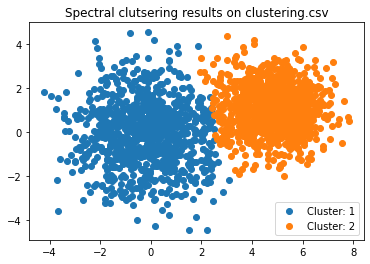

In [49]:
# Spectral clustering
# the eigen vectors corresponding to the k smallest eigen values are clustered by K means/Lloyd's algorithm
cost = np.inf
tolerance = 1e-5

cost, centers_, thisClustIdxs = lloyds_algorithm_other(centers_=centers_, data=KeigenVects, tolerance=tolerance, cost=cost)

for idx in centers_.keys():
    plt.scatter(data[:, 0][centers_[idx][1]], data[:, 1][centers_[idx][1]], label = 'Cluster: ' + str(idx+1))
    plt.legend()
plt.title('Spectral clutsering results on clustering.csv')
plt.show()

Clusters: [1 1 1 ... 0 0 0]
2000


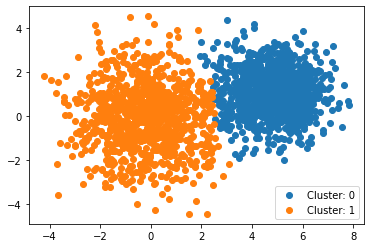

In [50]:
# Compare with standard sklearn package

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=c)
kmeans.fit(KeigenVects)
colors = kmeans.labels_

print("Clusters:", colors)
print(len(colors))
# Clusters: [2 1 1 0 0 0 3 3 2 2]

for color in np.unique(colors):
    plt.scatter(data[:, 0][colors==color], data[:, 1][colors==color], label = 'Cluster: ' + str(color))
    plt.legend()
plt.show()

### Both produces same results